# Section 1: Data Preparation

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split

## 1.1 Load the data

In [2]:
# load the dataset
data = pd.read_csv('Data/RFLFSODataFull_copy.csv')

# look at the top 5 rows
data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [3]:
# Summarize the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  int64  
 15  Te

## 1.2 Data Cleaning

In [4]:
# Rename columns for consistency

data = data.rename(columns={
    'FSO_Att': 'FSO_Att',
    'RFL_Att': 'RFL_Att',
    'AbsoluteHumidity': 'AH',
    'AbsoluteHumidityMax': 'AH_Max',
    'AbsoluteHumidityMin': 'AH_Min',
    'Distance': 'Dist',
    'Frequency': 'Freq',
    'Particulate': 'Part',
    'ParticulateMax': 'Part_Max',
    'ParticulateMin': 'Part_Min',
    'RainIntensity': 'RI',
    'RainIntensityMax': 'RI_Max',
    'RainIntensityMin': 'RI_Min',
    'RelativeHumidity': 'RH',
    'SYNOPCode': 'SC',
    'Temperature': 'Temp',
    'TemperatureDifference': 'Temp_Diff',
    'TemperatureMax': 'Temp_Max',
    'TemperatureMin': 'Temp_Min',
    'Time': 'Hour',
    'Visibility': 'Vis',
    'VisibilityMax': 'Vis_Max',
    'VisibilityMin': 'Vis_Min',
    'WindDirection': 'WD',
    'WindSpeed': 'WS',
    'WindSpeedMax': 'WS_Max',
    'WindSpeedMin': 'WS_Min'
})

**(1) Categorical variables** 

In [5]:
# List of categorical features
categorical_features = ['Hour', 'Freq', 'SC']

# Convert each feature to categorical
data[categorical_features] = data[categorical_features].astype('category')

In [6]:
# Mapping SYNOP codes to descriptive labels
synop_mapping = {
    0: 'clear',
    3: 'dust_storm',
    4: 'fog',
    5: 'drizzle',
    6: 'rain',
    7: 'snow',
    8: 'showers'
}

In [7]:
# Mapping freq to descriptive labels
freq_mapping = {
    83500000000: '83.5GHz',
    73500000000: '73.5GHz'
}

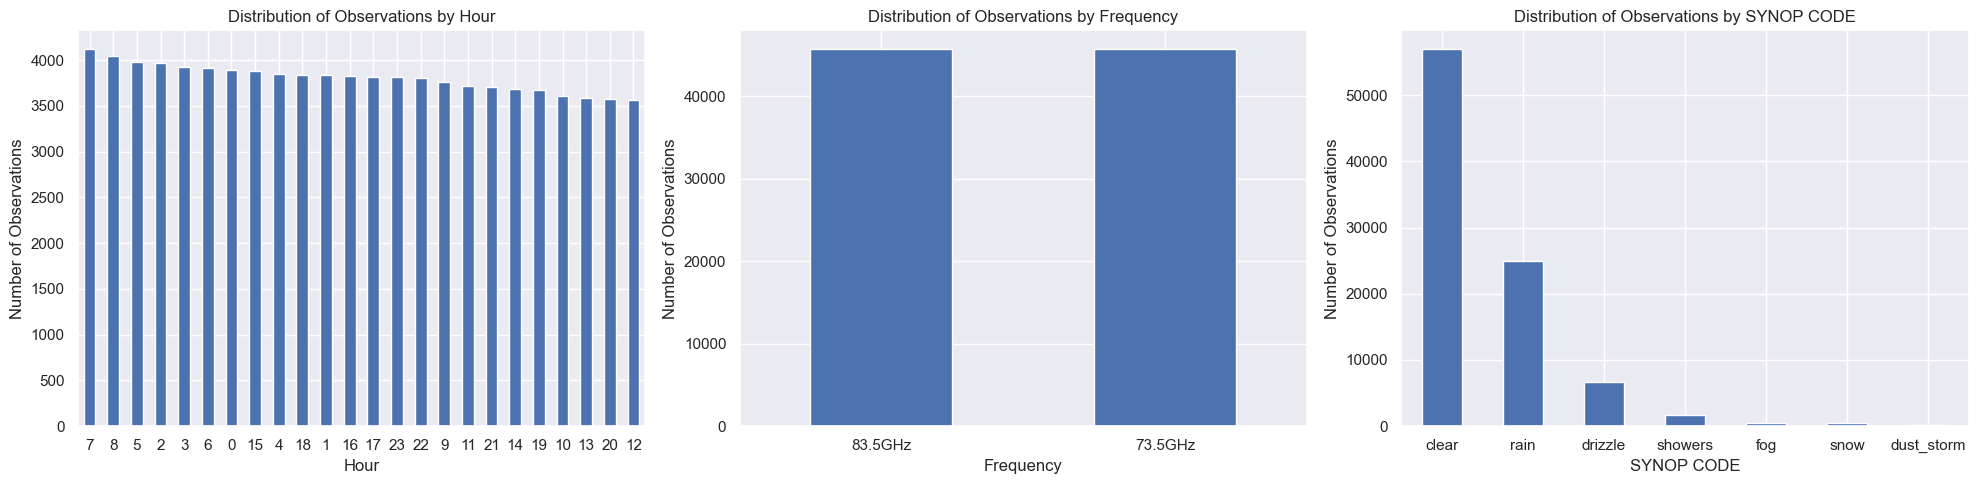

In [8]:
plt.figure(figsize=(20, 5))


plt.subplot(1, 3, 1)
data['Hour'].value_counts().plot(kind='bar')
plt.title('Distribution of Observations by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
data['Freq'].replace(freq_mapping).value_counts().plot(kind='bar')
plt.title('Distribution of Observations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
data['SC'].replace(synop_mapping).value_counts().plot(kind='bar')
plt.title('Distribution of Observations by SYNOP CODE')
plt.xlabel('SYNOP CODE')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('Figure/eps/EDA/categorical.eps', format='eps')
plt.show()

**(2) Continuous Variables**

In [9]:
# List of continuous features
continuous_features = [
    'AH', 'AH_Max', 'AH_Min', 'Part', 'Part_Max', 'Part_Min', 
    'RI', 'RI_Max', 'RI_Min', 'Vis', 'Vis_Max', 'Vis_Min', 
    'WS', 'WS_Max', 'WS_Min', 'Temp', 'Temp_Max', 'Temp_Min', 
    'Temp_Diff', 'RH', 'Dist', 'WD'
]

In [10]:
# Dictionary mapping features to detailed labels
feature_labels = {
    'AH': 'Absolute Humidity (g/m³)',
    'AH_Max': 'Max Absolute Humidity (g/m³)',
    'AH_Min': 'Min Absolute Humidity (g/m³)',
    'Part': 'Particle Count (integer)',
    'Part_Max': 'Max Particle Count (integer)',
    'Part_Min': 'Min Particle Count (integer)',
    'RI': 'Rain Intensity (mm/hr)',
    'RI_Max': 'Max Rain Intensity (mm/hr)',
    'RI_Min': 'Min Rain Intensity (mm/hr)',
    'Vis': 'Visibility (m)',
    'Vis_Max': 'Max Visibility (m)',
    'Vis_Min': 'Min Visibility (m)',
    'WS': 'Wind Speed (m/s)',
    'WS_Max': 'Max Wind Speed (m/s)',
    'WS_Min': 'Min Wind Speed (m/s)',
    'Temp': 'Temperature (K)',
    'Temp_Max': 'Max Temperature (K)',
    'Temp_Min': 'Min Temperature (K)',
    'Temp_Diff': 'Temperature Difference (K)',
    'RH': 'Relative Humidity (%)',
    'Dist': 'Link Distance (m)',
    'WD': 'Wind Direction (degrees)'
}

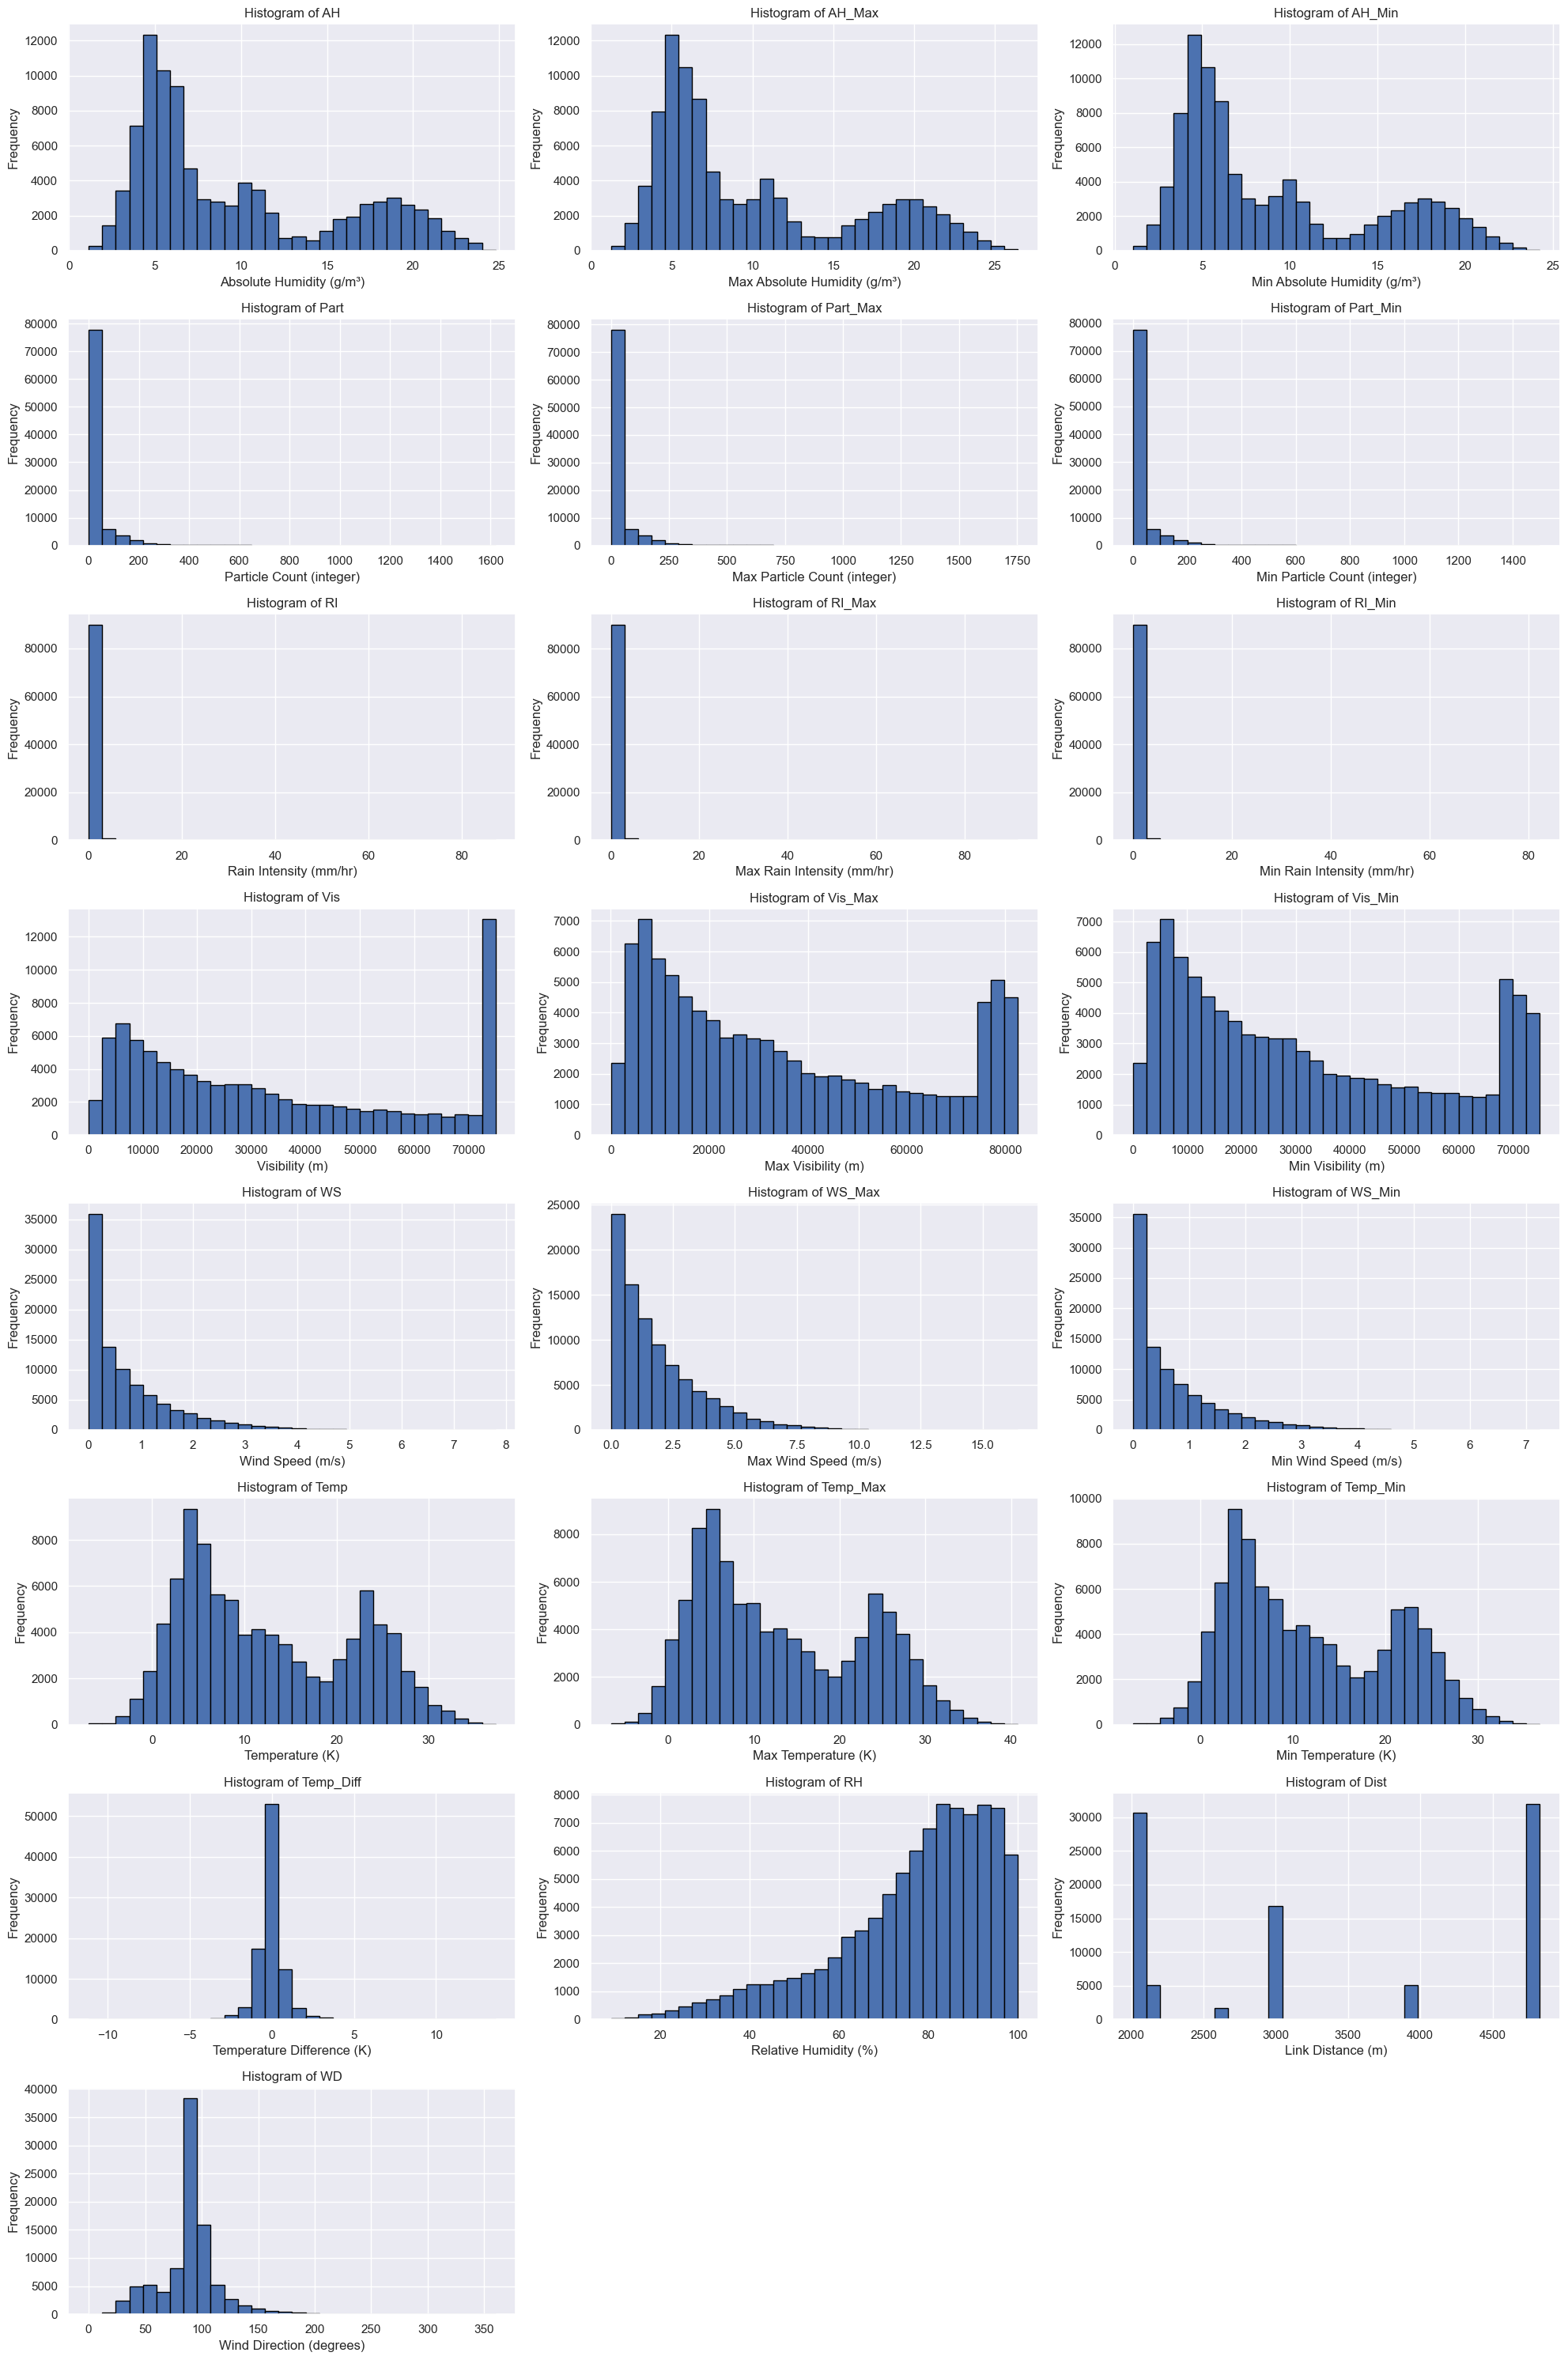

In [11]:
# Number of rows and columns for subplots
n_rows = 8
n_cols = 3

plt.figure(figsize=(20, 30))

# Loop through each feature and create a histogram with descriptive labels
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(data[feature], bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature_labels.get(feature, feature))  # Use detailed label if available
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Figure/eps/EDA/continuous.eps', format='eps')
plt.show()


In [12]:
# Generate descriptive statistics for the dataset and round to 4 decimal places
data.describe().round(4)

,FSO_Att,RFL_Att,AH,AH_Max,AH_Min,Dist,Part,Part_Max,Part_Min,RI,...,Temp_Diff,Temp_Max,Temp_Min,Vis,Vis_Max,Vis_Min,WD,WS,WS_Max,WS_Min
count,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,...,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000,91379.0000
mean,6.7695,11.6191,9.5539,10.0328,9.0763,3297.9303,27.0660,28.4171,25.7171,0.2470,...,-0.0655,13.1660,11.9046,32986.4175,34636.6846,31331.6190,89.0433,0.7391,1.8510,0.7022
std,3.9038,3.4389,5.8586,6.1628,5.5759,1224.3059,72.1340,75.7619,68.5952,1.6423,...,0.7983,9.5898,8.6940,24713.8744,25978.8452,23497.8731,26.4156,0.8713,1.7627,0.8288
min,0.7884,0.0271,1.1416,1.2383,1.0497,2012.0001,0.0000,0.0000,0.0000,0.0000,...,-11.1570,-6.6934,-7.2701,10.1520,11.0297,9.4843,0.0000,0.0000,0.0000,0.0000
25%,3.4731,10.8293,4.9590,5.2059,4.7095,2019.4318,0.0000,0.0000,0.0000,0.0000,...,-0.4000,4.9054,4.4384,11158.5984,11721.4475,10588.7932,82.9767,0.0767,0.5127,0.0729
50%,6.3362,11.8566,6.8707,7.2055,6.5240,2959.8637,0.0000,0.0000,0.0000,0.0000,...,-0.1000,10.8039,9.7745,26378.6362,27686.2140,25047.1885,90.8674,0.4380,1.3231,0.4163
75%,8.6650,12.8479,14.0495,14.7827,13.3793,4820.8902,16.9476,17.7760,16.0381,0.0000,...,0.2500,22.4704,20.3224,53493.8213,56092.2124,50797.6904,98.4827,1.0886,2.6818,1.0366
max,32.4552,46.8931,24.7909,26.4073,24.2684,4828.0000,1621.0019,1753.7479,1500.6664,87.2648,...,13.6300,40.7714,36.7242,75004.9992,82503.1301,74999.3434,360.0000,7.7991,16.4211,7.2523


**(3) Output Variables**

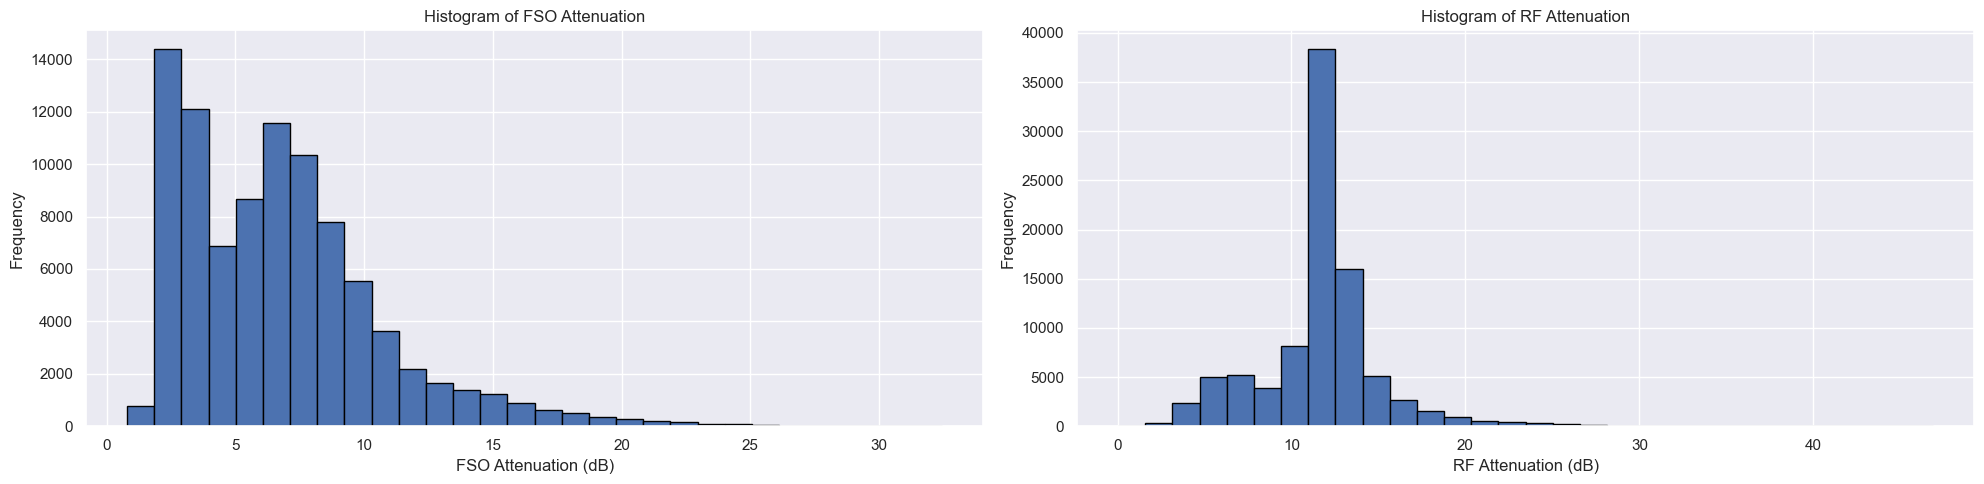

In [13]:
plt.figure(figsize=(20, 5))

# Histogram for FSO_Att
plt.subplot(1, 2, 1)
plt.hist(data['FSO_Att'], bins=30, edgecolor='black')
plt.title('Histogram of FSO Attenuation')
plt.xlabel('FSO Attenuation (dB)')
plt.ylabel('Frequency')

# Histogram for RFL_Att
plt.subplot(1, 2, 2)
plt.hist(data['RFL_Att'], bins=30, edgecolor='black')
plt.title('Histogram of RF Attenuation')
plt.xlabel('RF Attenuation (dB)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Figure/eps/EDA/output_variables.eps', format='eps')
plt.show()

## 1.3 Data Exploration

**(1) FSO Attenuation vs Categorical Features** 

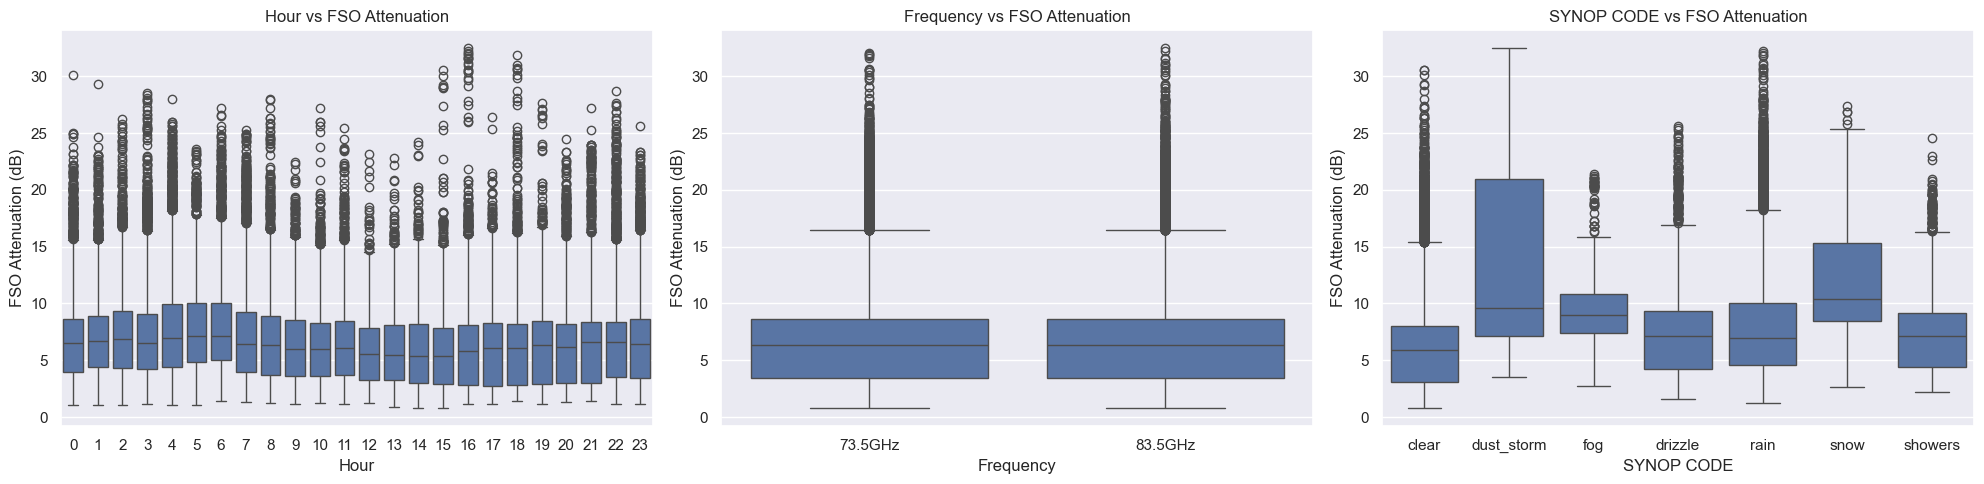

In [14]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['Hour'], y=data['FSO_Att'])
plt.xlabel('Hour')
plt.ylabel('FSO Attenuation (dB)')
plt.title('Hour vs FSO Attenuation')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['Freq'].replace(freq_mapping), y=data['FSO_Att'])
plt.xlabel('Frequency')
plt.ylabel('FSO Attenuation (dB)')
plt.title('Frequency vs FSO Attenuation')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['SC'].replace(synop_mapping), y=data['FSO_Att'])
plt.xlabel('SYNOP CODE')
plt.ylabel('FSO Attenuation (dB)')
plt.title('SYNOP CODE vs FSO Attenuation')

plt.tight_layout()
plt.savefig('Figure/eps/EDA/categorical_vs_fso.eps', format='eps')
plt.show()

**(2) FSO Attenuation vs Continuous Features** 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


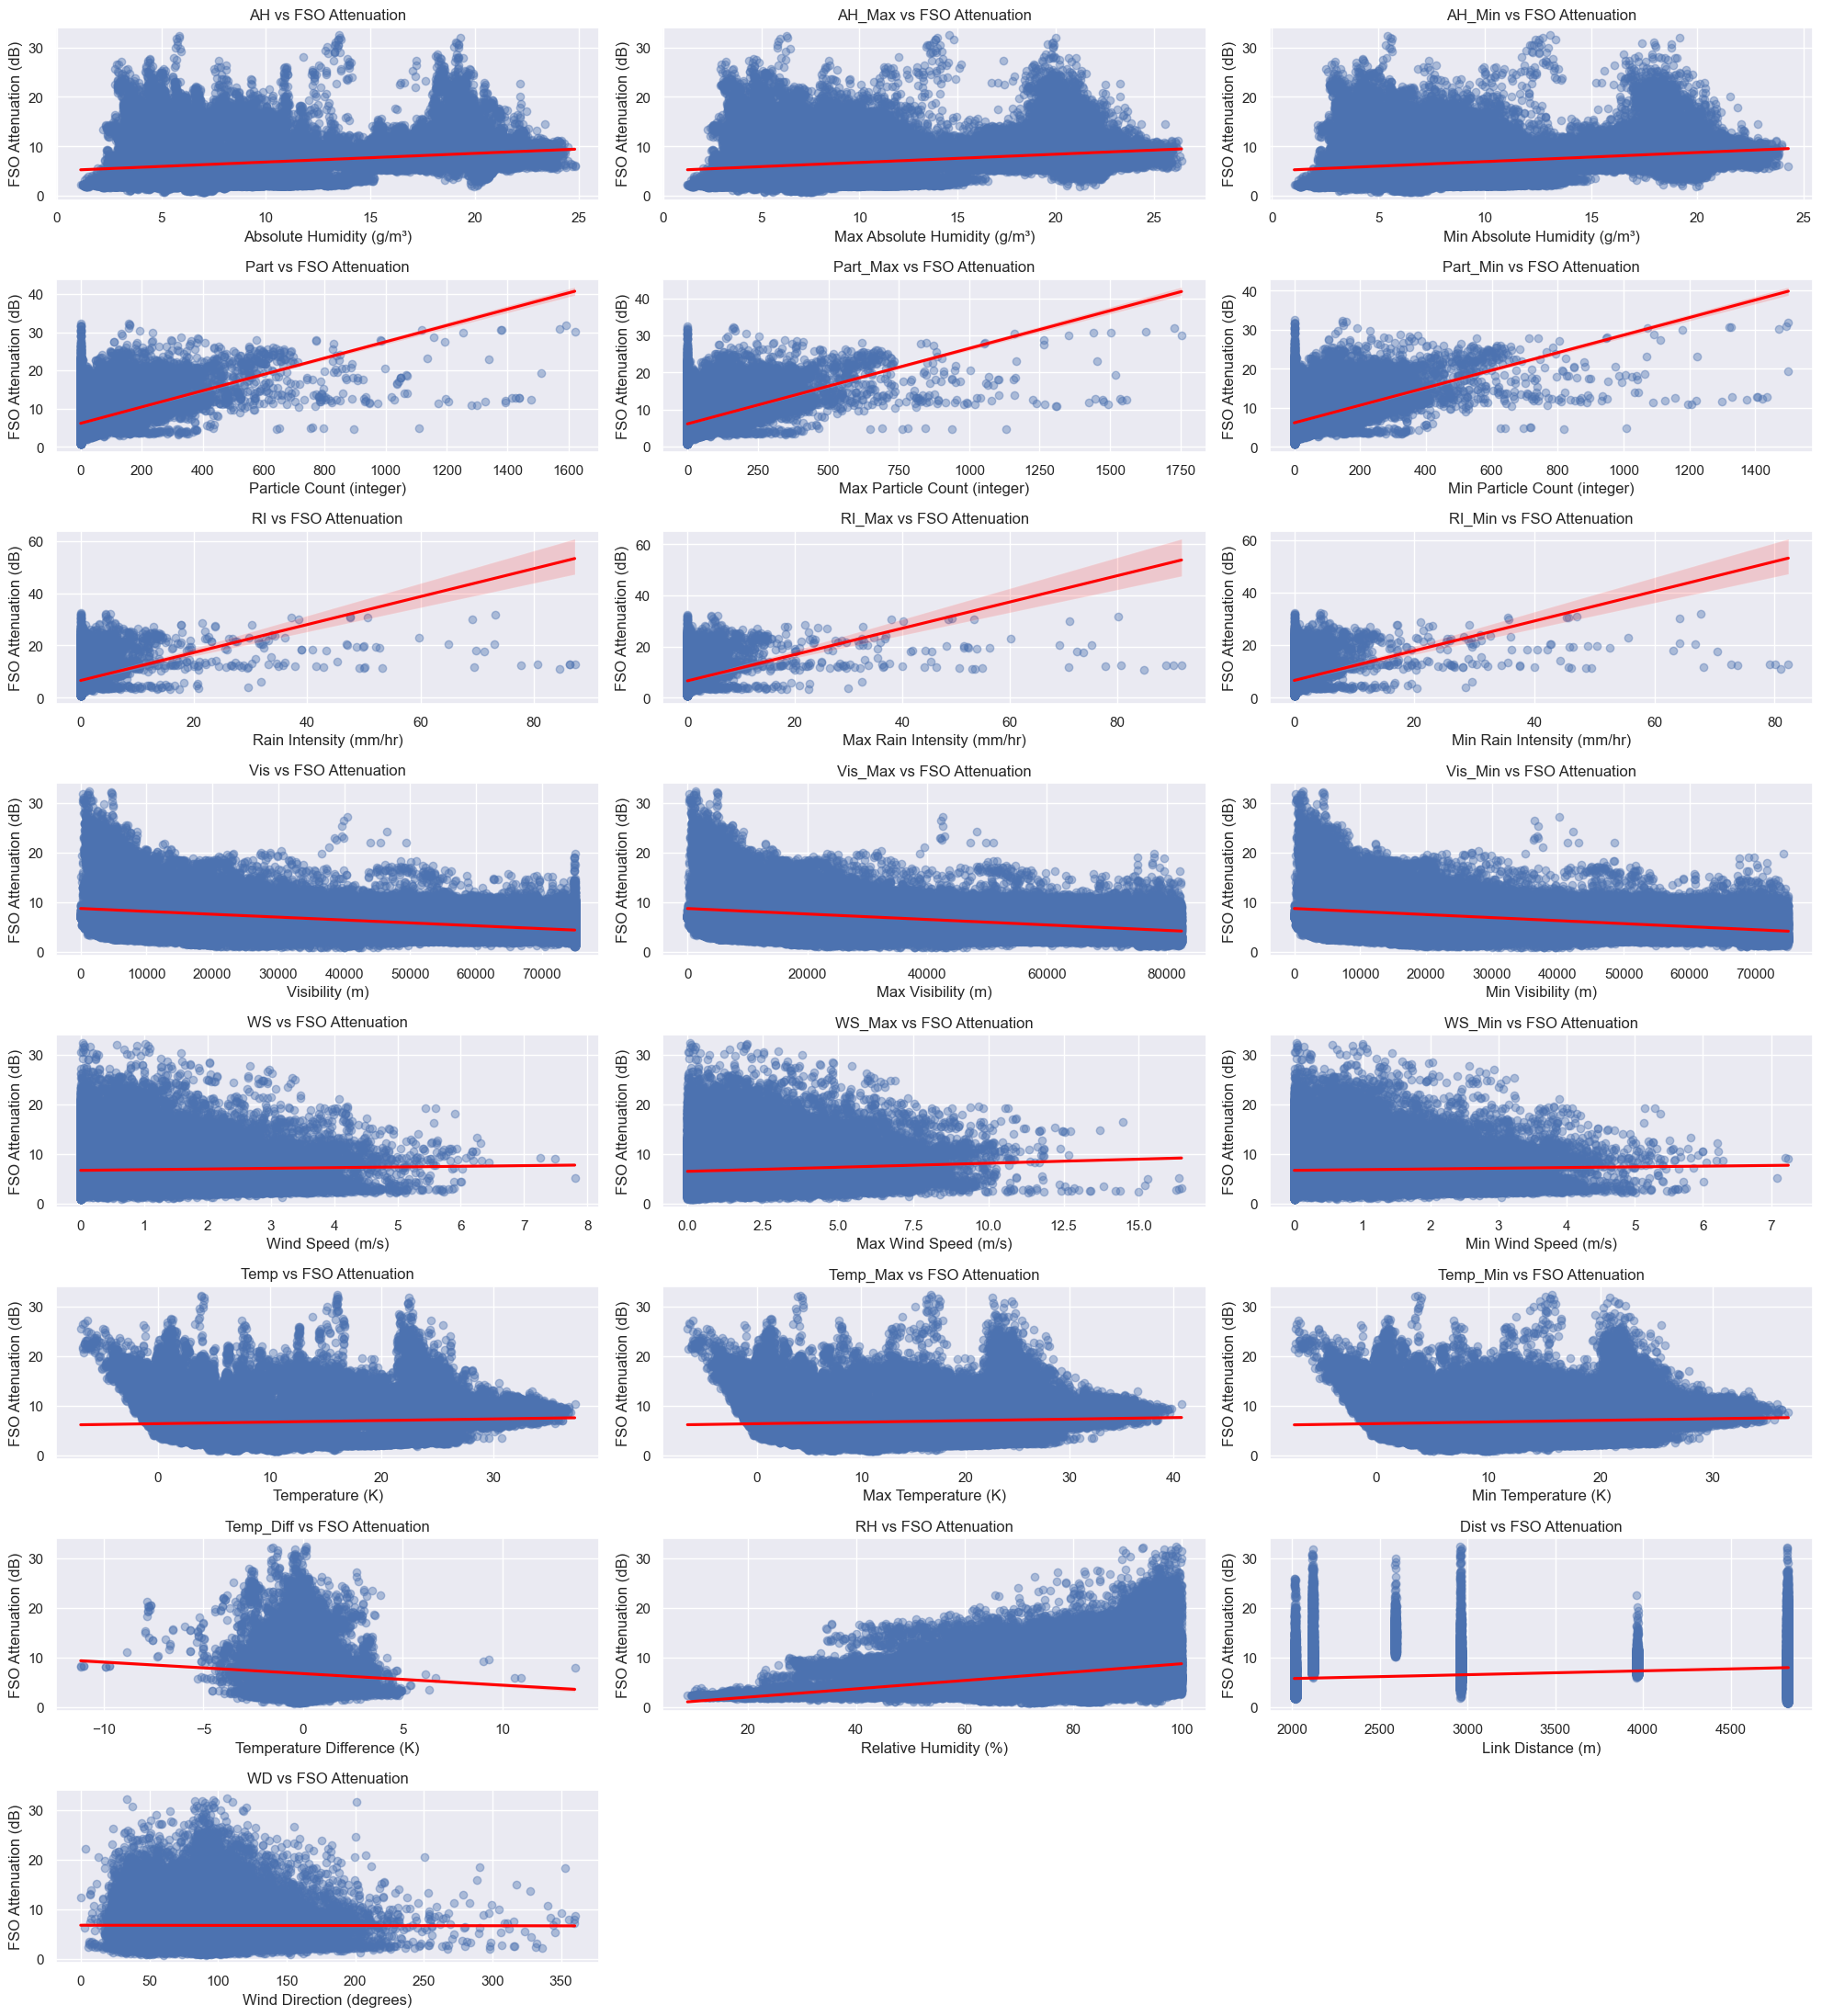

In [15]:
# Plot FSO_Att with continuous features with trend lines
plt.figure(figsize=(20, 60))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(len(continuous_features), 3, i)
    sns.regplot(x=data[feature], y=data['FSO_Att'], scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
    plt.xlabel(feature_labels.get(feature, feature))
    plt.ylabel('FSO Attenuation (dB)')
    plt.title(f'{feature} vs FSO Attenuation')

plt.tight_layout()
plt.savefig('Figure/eps/EDA/continuous_vs_fso.eps', format='eps')
plt.show()

**(3) RF Attenuation vs Categorical Features** 

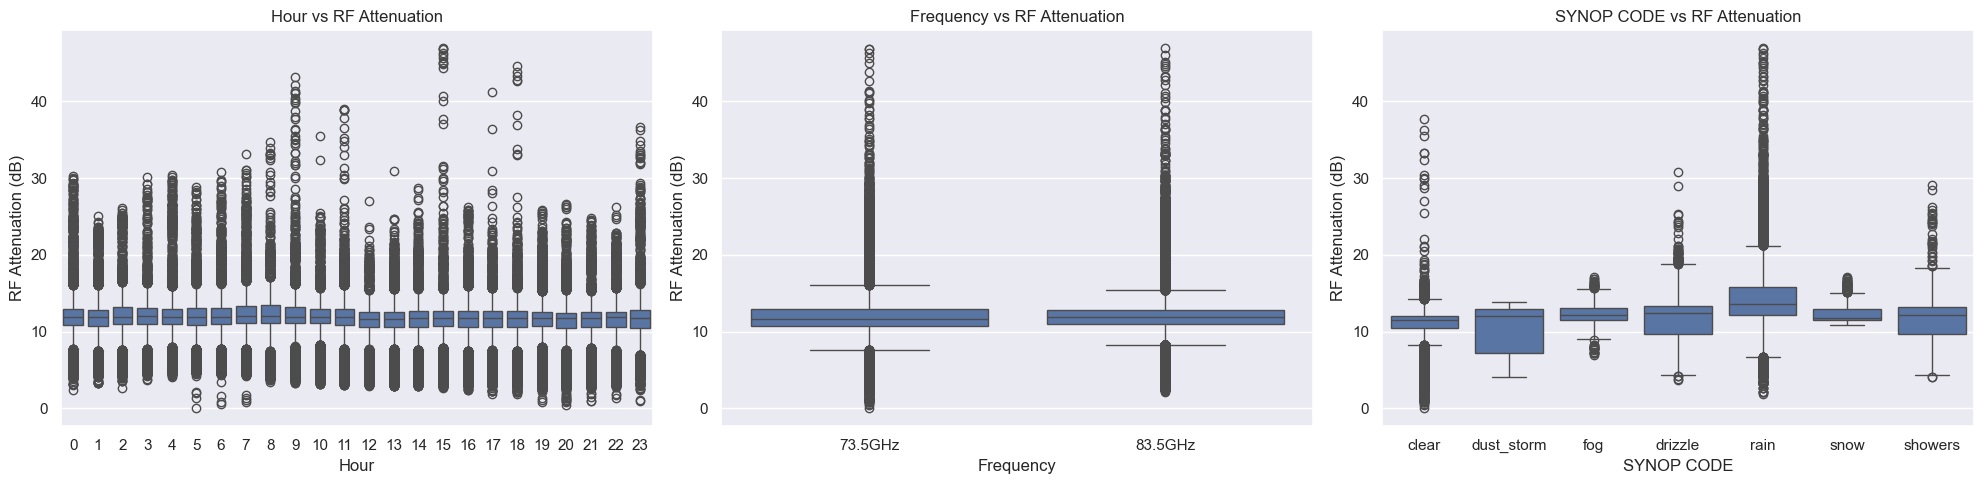

In [16]:
plt.figure(figsize=(20, 5))


plt.subplot(1, 3, 1)
sns.boxplot(x=data['Hour'], y=data['RFL_Att'])
plt.xlabel('Hour')
plt.ylabel('RF Attenuation (dB)')
plt.title('Hour vs RF Attenuation')


plt.subplot(1, 3, 2)
sns.boxplot(x=data['Freq'].replace(freq_mapping), y=data['RFL_Att'])
plt.xlabel('Frequency')
plt.ylabel('RF Attenuation (dB)')
plt.title('Frequency vs RF Attenuation')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['SC'].replace(synop_mapping), y=data['RFL_Att'])
plt.xlabel('SYNOP CODE')
plt.ylabel('RF Attenuation (dB)')
plt.title('SYNOP CODE vs RF Attenuation')

plt.tight_layout()
plt.savefig('Figure/eps/EDA/categorical_vs_rf.eps', format='eps')
plt.show()

**(4) RF Attenuation vs Continuous Features** 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


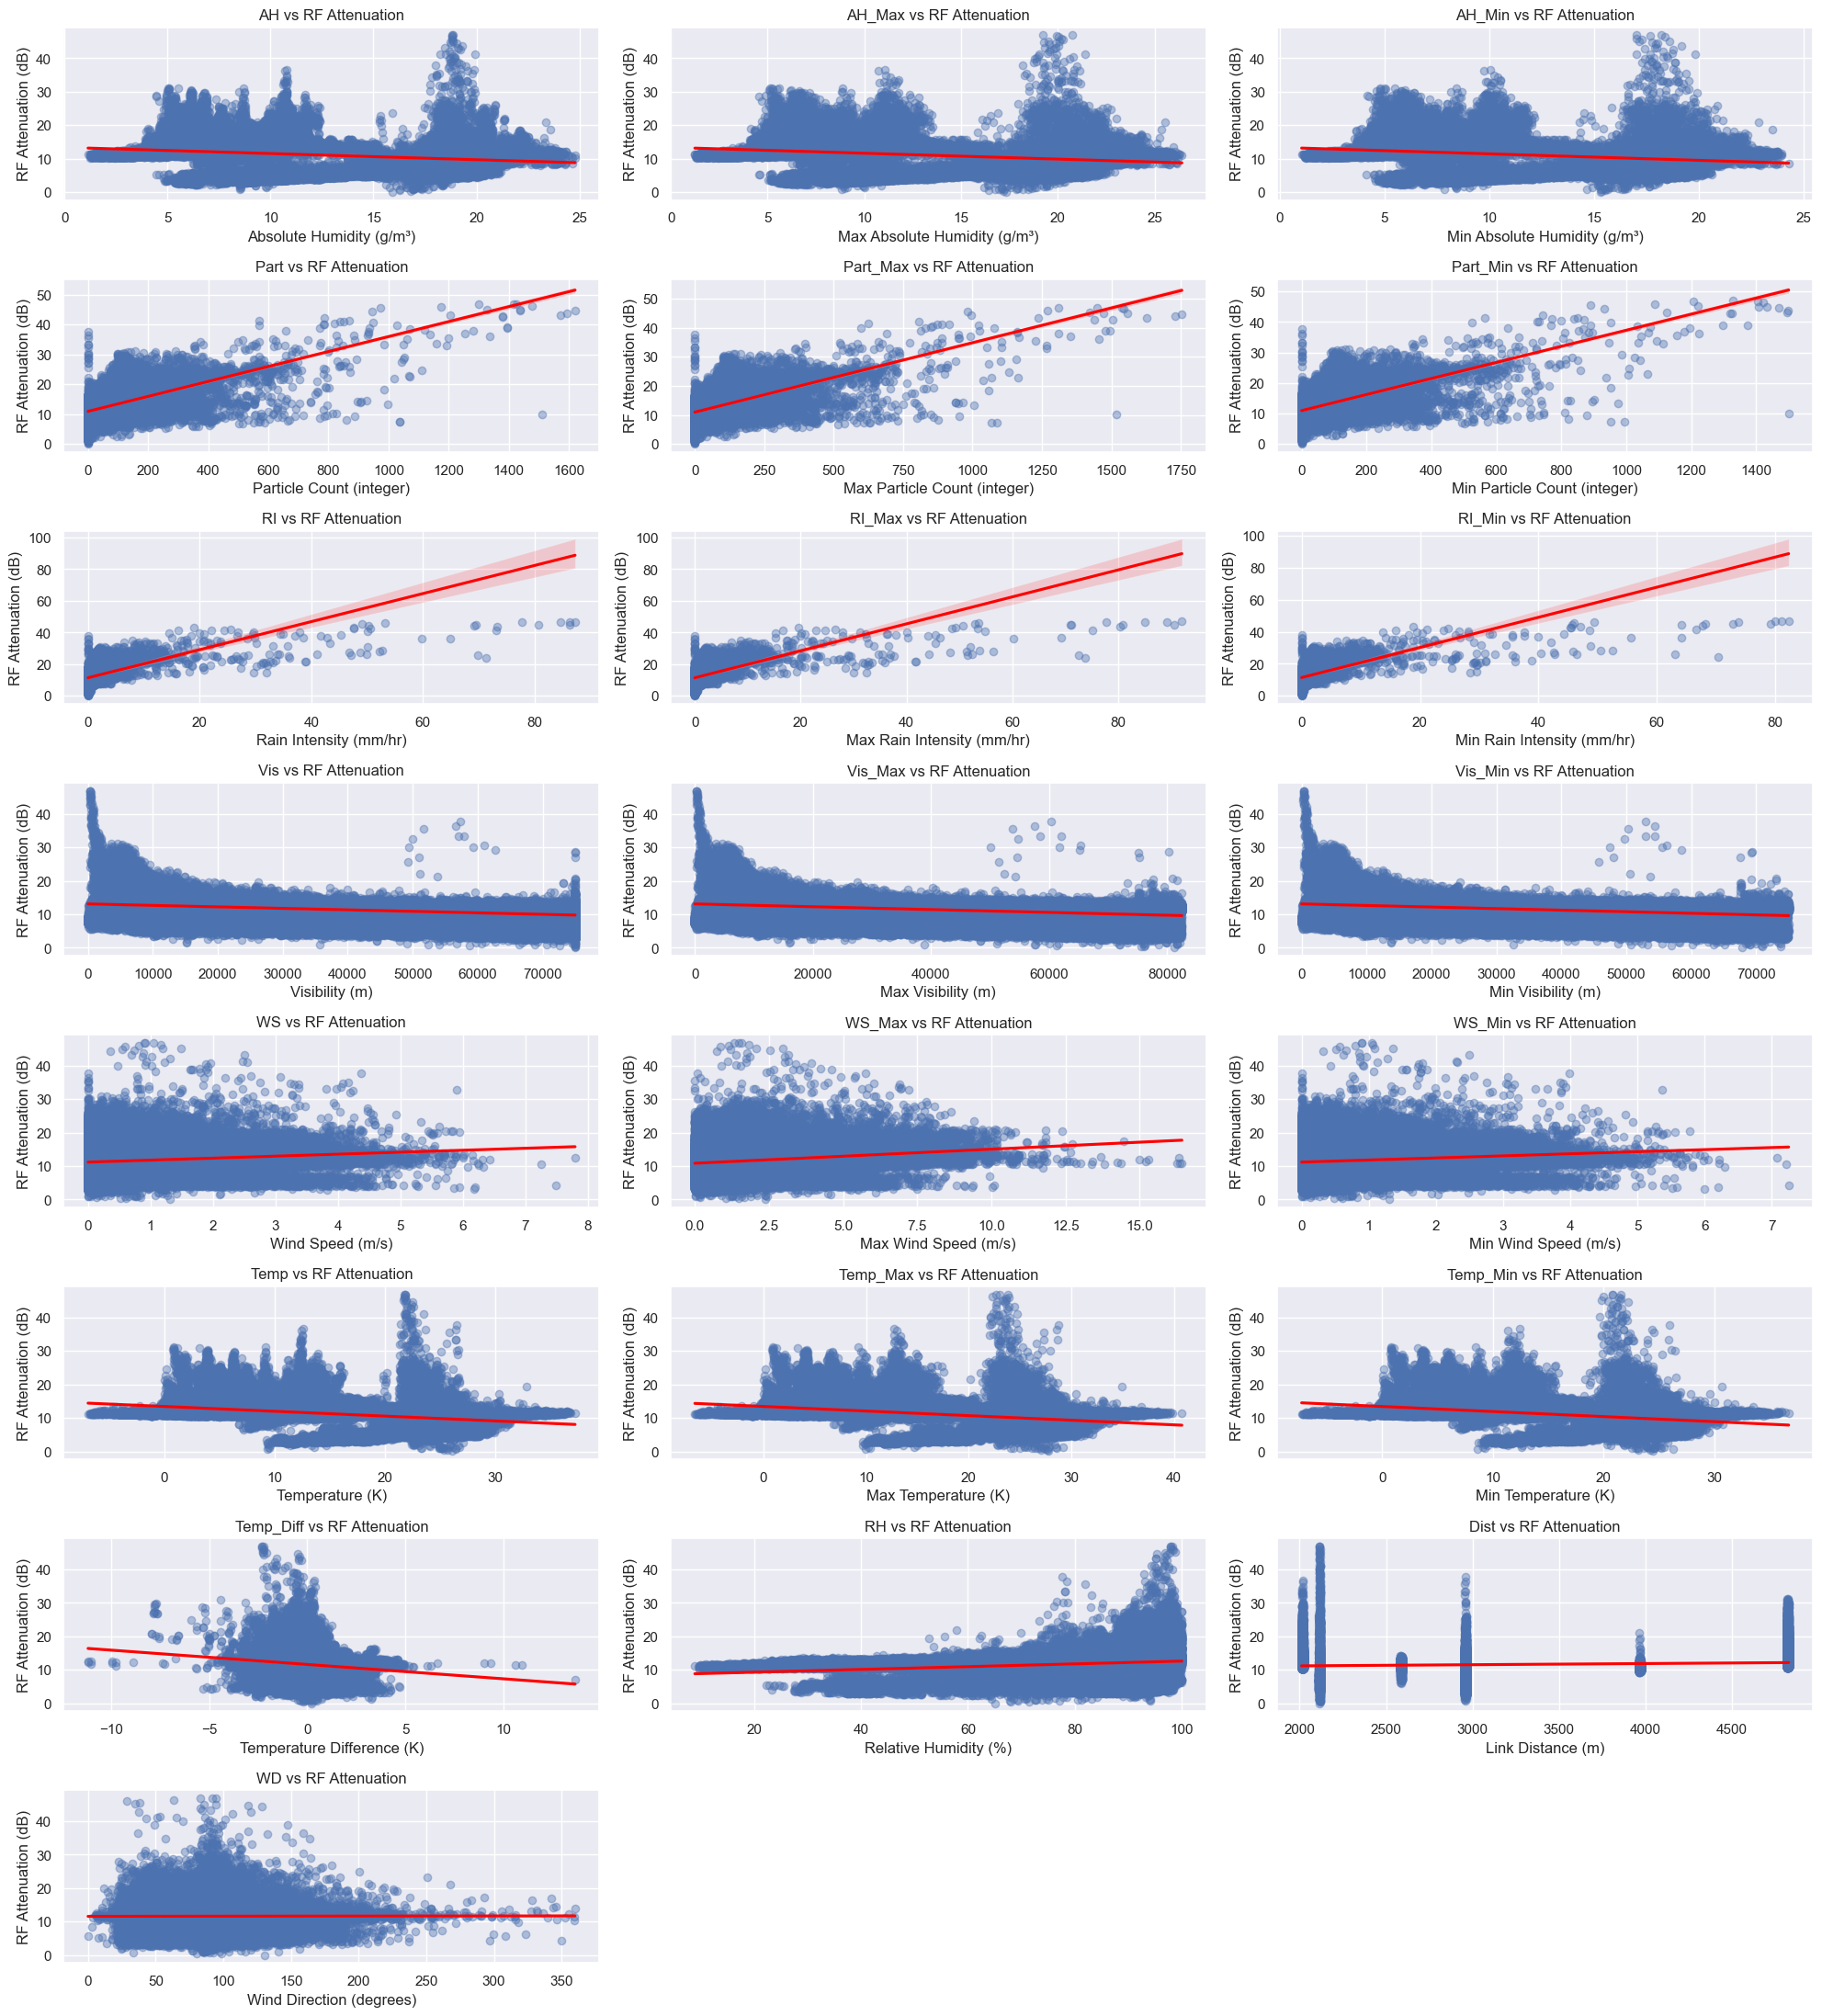

In [17]:
# Plot FSO_Att with continuous features with trend lines
plt.figure(figsize=(20, 60))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(len(continuous_features), 3, i)
    sns.regplot(x=data[feature], y=data['RFL_Att'], scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
    plt.xlabel(feature_labels.get(feature, feature))
    plt.ylabel('RF Attenuation (dB)')
    plt.title(f'{feature} vs RF Attenuation')

plt.tight_layout()
plt.savefig('Figure/eps/EDA/continuous_vs_rf.eps', format='eps')
plt.show()

**(5) Correlation between each feature**

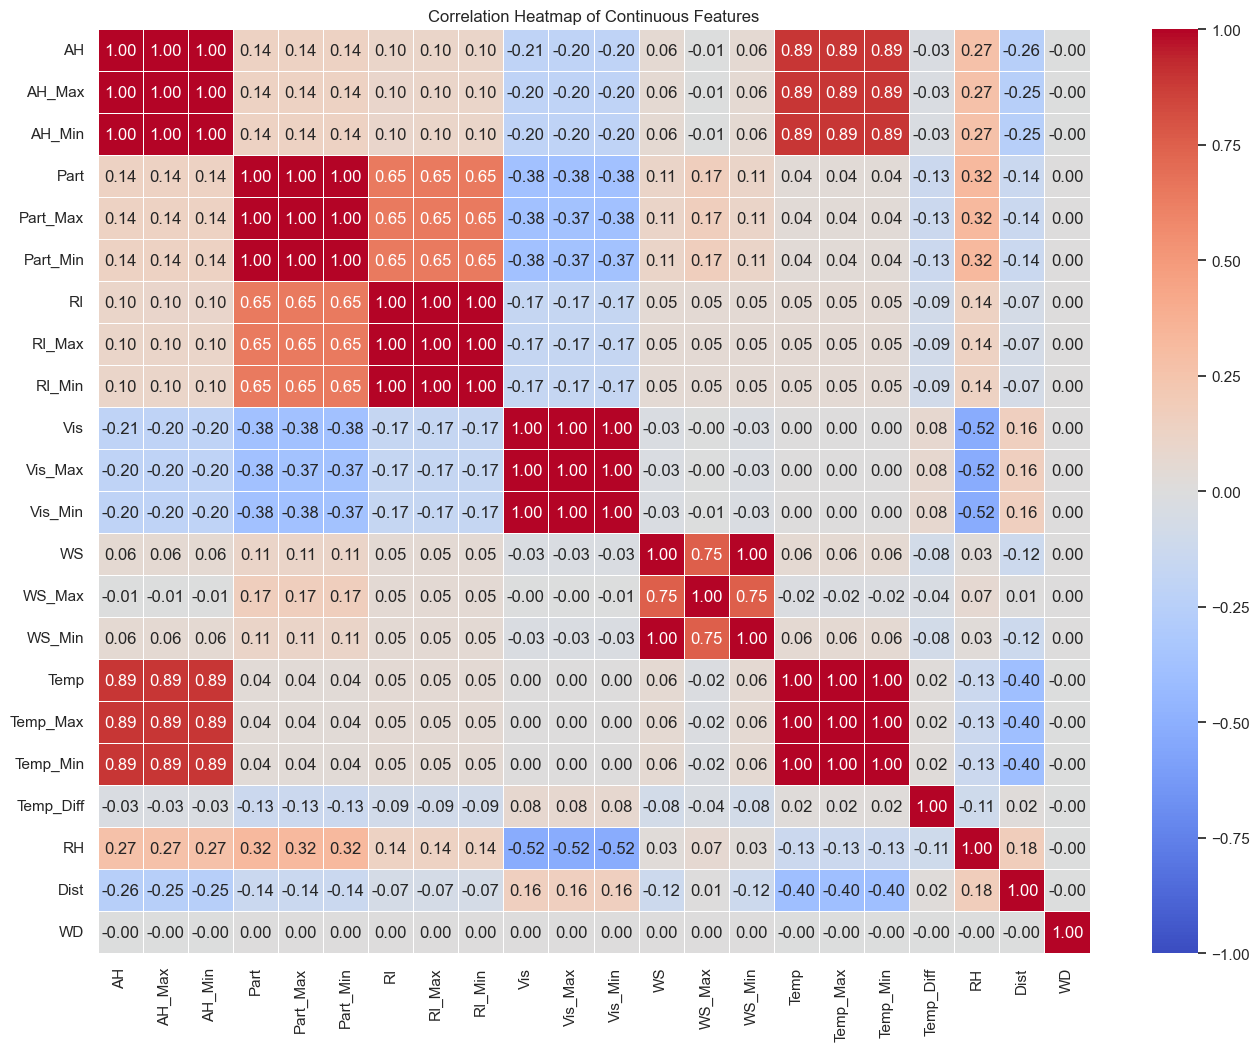

In [18]:
# Filter data to include only continuous features
continuous_data = data[continuous_features]

# Compute correlation matrix
correlation_matrix = continuous_data.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Features")
plt.savefig('Figure/eps/EDA/continuous_heatmap.eps', format='eps')
plt.show()

## 1.4 Data sets Splitting

**(1) Split data into training, validation, and test sets**

In [19]:
# Split data into training, validation, and test sets 
# using stratified sampling to maintain SYNOP CODE class proportions

# First split: training + validation (80%) and test (20%)
bigtrain_set, test_set = train_test_split(data, test_size=0.2, random_state=42, 
                                          stratify=data['SC'])

# Second split: training (80% of 80% = 64%) and validation (20% of 80% = 16%)
train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42, 
                                      stratify=bigtrain_set['SC'])

# Verify the split proportions for each set
print("Train set class distribution:\n", train_set['SC'].value_counts(normalize=True))
print("Validation set class distribution:\n", val_set['SC'].value_counts(normalize=True))
print("Test set class distribution:\n", test_set['SC'].value_counts(normalize=True))

Train set class distribution:
 SC
0    0.623388
6    0.273777
5    0.072279
8    0.018775
4    0.005096
7    0.004583
3    0.002103
Name: proportion, dtype: float64
Validation set class distribution:
 SC
0    0.623350
6    0.273784
5    0.072293
8    0.018809
4    0.005130
7    0.004582
3    0.002052
Name: proportion, dtype: float64
Test set class distribution:
 SC
0    0.623386
6    0.273802
5    0.072281
8    0.018768
4    0.005089
7    0.004596
3    0.002079
Name: proportion, dtype: float64


In [20]:
# Define the feature columns
feature_columns = continuous_features + categorical_features  

# Extract features for training, validation, and test sets
X_train = train_set[feature_columns]
X_val = val_set[feature_columns]
X_test = test_set[feature_columns]

# Extract FSO_Att and RFL_Att as separate output sets for training, validation, and test
y_train_FSO = train_set['FSO_Att']
y_train_RF = train_set['RFL_Att']

y_val_FSO = val_set['FSO_Att']
y_val_RF = val_set['RFL_Att']

y_test_FSO = test_set['FSO_Att']
y_test_RF = test_set['RFL_Att']

# Verify the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train_FSO shape:", y_train_FSO.shape)
print("y_train_RF shape:", y_train_RF.shape)
print("X_val shape:", X_val.shape)
print("y_val_FSO shape:", y_val_FSO.shape)
print("y_val_RF shape:", y_val_RF.shape)
print("X_test shape:", X_test.shape)
print("y_test_FSO shape:", y_test_FSO.shape)
print("y_test_RF shape:", y_test_RF.shape)

X_train shape: (58482, 25)
y_train_FSO shape: (58482,)
y_train_RF shape: (58482,)
X_val shape: (14621, 25)
y_val_FSO shape: (14621,)
y_val_RF shape: (14621,)
X_test shape: (18276, 25)
y_test_FSO shape: (18276,)
y_test_RF shape: (18276,)


In [21]:
# Create directories to save the files if they don't already exist
os.makedirs("Data/Splitting/Generic", exist_ok=True)

# Save feature sets
X_train.to_csv("Data/Splitting/Generic/X_train.csv", index=False)
X_val.to_csv("Data/Splitting/Generic/X_val.csv", index=False)
X_test.to_csv("Data/Splitting/Generic/X_test.csv", index=False)

# Save FSO_Att output sets
y_train_FSO.to_csv("Data/Splitting/Generic/y_train_FSO.csv", index=False)
y_val_FSO.to_csv("Data/Splitting/Generic/y_val_FSO.csv", index=False)
y_test_FSO.to_csv("Data/Splitting/Generic/y_test_FSO.csv", index=False)

# Save RFL_Att output sets
y_train_RF.to_csv("Data/Splitting/Generic/y_train_RF.csv", index=False)
y_val_RF.to_csv("Data/Splitting/Generic/y_val_RF.csv", index=False)
y_test_RF.to_csv("Data/Splitting/Generic/y_test_RF.csv", index=False)

print("Generic Datasets saved successfully.")

Generic Datasets saved successfully.


**(2) Creating SYNOP CODE-Based Subsets for Training and Validation Sets**

In [22]:
# Dictionary to store subsets for each SYNOP CODE in training and validation sets
train_subsets = {code: subset for code, subset in train_set.groupby('SC')}
val_subsets = {code: subset for code, subset in val_set.groupby('SC')}

# Print the sizes of each subset for verification
print("Training subsets by SYNOP CODE:")
for code, subset in train_subsets.items():
    print(f"SYNOP CODE {code}: {len(subset)} samples")

print("\nValidation subsets by SYNOP CODE:")
for code, subset in val_subsets.items():
    print(f"SYNOP CODE {code}: {len(subset)} samples")

Training subsets by SYNOP CODE:
SYNOP CODE 0: 36457 samples
SYNOP CODE 3: 123 samples
SYNOP CODE 4: 298 samples
SYNOP CODE 5: 4227 samples
SYNOP CODE 6: 16011 samples
SYNOP CODE 7: 268 samples
SYNOP CODE 8: 1098 samples

Validation subsets by SYNOP CODE:
SYNOP CODE 0: 9114 samples
SYNOP CODE 3: 30 samples
SYNOP CODE 4: 75 samples
SYNOP CODE 5: 1057 samples
SYNOP CODE 6: 4003 samples
SYNOP CODE 7: 67 samples
SYNOP CODE 8: 275 samples


/var/folders/gx/pwy0byr15pq8m62vhfygrw8w0000gn/T/ipykernel_3237/1591188162.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_subsets = {code: subset for code, subset in train_set.groupby('SC')}
/var/folders/gx/pwy0byr15pq8m62vhfygrw8w0000gn/T/ipykernel_3237/1591188162.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  val_subsets = {code: subset for code, subset in val_set.groupby('SC')}


In [23]:
# Dictionary to store feature and output subsets for each SYNOP CODE in training and validation sets
train_subsets_X = {}
train_subsets_y_FSO = {}
train_subsets_y_RF = {}

val_subsets_X = {}
val_subsets_y_FSO = {}
val_subsets_y_RF = {}

# Redefine feature_columns to ensure SC is not included
feature_columns_specific = [col for col in feature_columns if col != 'SC']

# Process each SYNOP CODE subset for the training set
for code, subset in train_subsets.items():
    # Extract features and outputs for the training subset
    train_subsets_X[code] = subset[feature_columns_specific] 
    train_subsets_y_FSO[code] = subset['FSO_Att']
    train_subsets_y_RF[code] = subset['RFL_Att']

# Process each SYNOP CODE subset for the validation set
for code, subset in val_subsets.items():
    # Extract features and outputs for the validation subset
    val_subsets_X[code] = subset[feature_columns_specific]
    val_subsets_y_FSO[code] = subset['FSO_Att']
    val_subsets_y_RF[code] = subset['RFL_Att']


In [24]:
# Create directories to save the files if they don't already exist
os.makedirs("Data/Splitting/Specific", exist_ok=True)

# Save training subsets for each SYNOP CODE
for code in train_subsets_X.keys():
    # Save features
    train_subsets_X[code].to_csv(f"Data/Splitting/Specific/train_X_SC_{code}.csv", index=False)
    # Save FSO_Att output
    train_subsets_y_FSO[code].to_csv(f"Data/Splitting/Specific/train_y_FSO_SC_{code}.csv", index=False)
    # Save RFL_Att output
    train_subsets_y_RF[code].to_csv(f"Data/Splitting/Specific/train_y_RF_SC_{code}.csv", index=False)

# Save validation subsets for each SYNOP CODE
for code in val_subsets_X.keys():
    # Save features
    val_subsets_X[code].to_csv(f"Data/Splitting/Specific/val_X_SC_{code}.csv", index=False)
    # Save FSO_Att output
    val_subsets_y_FSO[code].to_csv(f"Data/Splitting/Specific/val_y_FSO_SC_{code}.csv", index=False)
    # Save RFL_Att output
    val_subsets_y_RF[code].to_csv(f"Data/Splitting/Specific/val_y_RF_SC_{code}.csv", index=False)

print("Specific Datasets saved successfully.")

Specific Datasets saved successfully.
